In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib as m

import glob
import os
import math

import grok

In [42]:
oper_reverse_dict = {v: k for k, v in grok.data.VALID_OPERATORS.items()}
operators = oper_reverse_dict.keys()

In [43]:
operators

dict_keys(['addition', 'subtraction', 'muliplication', 'division', 'squarepoly', 'cubepoly', 'quad1', 'quad2', 'quad3', 'cube1', 'cube2', 'mix1', 's5', 's5conj', 's5aba', 'even-addition_odd-multiplication', 'even-addition_odd-subtraction', 'sort', 'reverse', 'copy'])

In [44]:
def get_operator_symbols(path):
    for op_name in operators:
        if op_name in path:
            return oper_reverse_dict[op_name]

In [164]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color. The amount parameter specifies the lightening factor and ranges from 0 (no change) to 1 (white).
    """
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = np.array(mcolors.to_rgb(c))
    c = c + (1.0 - c) * amount
    return c

def plot_val_acc(csvpath, ax=None, scale='arithmetic', title='Validation Accuracy over Epochs', colormap=None):
    is_single_plot = ax == None
    _fig = None if is_single_plot else ax
    if is_single_plot:
        plt.figure(figsize=(10, 6))

    colors = []
    if colormap:
        colormap = m.colormaps[colormap]
        resolution = 5
        colors = [colormap(i) for i in np.linspace(0, 1, resolution)]

    try:
        df = pd.read_csv(csvpath)
        is_single_plot = ax == None
        
        if colormap:
            val_color = colors[1]
            train_color = colors[-1]
            
            if is_single_plot:
                plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-', color=val_color)
                plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-', color=train_color)
            else:
                _fig.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-', color=val_color)
                _fig.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-', color=train_color)
        else:
            if is_single_plot:
                plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
                plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')
            else:
                _fig.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-')
                _fig.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-')
          
        if is_single_plot:
            plt.title(title)
            plt.xlabel('Epoch')
            plt.ylabel('Validation Accuracy')
        else:
            _fig.set_title(title)
            _fig.set_xlabel('Epoch')
            _fig.set_ylabel('Validation Accuracy')
            
        if scale == 'arithmetic':
            if is_single_plot:
                plt.grid(True)
            else:
                _fig.grid(True)
        elif scale == 'log':
            if is_single_plot:
                plt.xscale('log')
                plt.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
            else:
                _fig.set_xscale('log')
                _fig.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale

    except:
        print(f'{csvpath} doesn\'t exists')


def get_plot_batches(exptpath, plot_num=9):
    log_subdir_path = 'lightning_logs/version_0/metrics.csv'
    total = glob.glob(f'{exptpath}/*')
    batches = {}
    for i, expt_path in enumerate(total):
        key = i // plot_num
        if key not in batches.keys():
            batches[key] = []
        batches[key].append(os.path.join(expt_path, log_subdir_path))
    return batches

def draw_figure(fig_title, csvpaths, plot_num=9, save_fig=False):
    axis_len = math.isqrt(plot_num)
    assert axis_len * axis_len == plot_num

    # Create a figure with 3x3 subplots
    fig, axs = plt.subplots(axis_len, axis_len, figsize=(12, 8))
    fig.suptitle(f'{fig_title}')
    for i, csvpath in enumerate(csvpaths):
        title = get_operator_symbols(csvpath)
        plot_val_acc(csvpath, ax=axs[i//axis_len, i % axis_len], scale='log', title=title)
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()
    if save_fig:
        fig.savefig(f'{fig_title}.png', bbox_inches='tight')


def plot_multiple_val_acc(csvpaths, ax=None, scale='arithmetic', title='Validation Accuracy over Epochs', save_fig=False, colormap='winter'):
    is_single_plot = ax == None
    _fig = None if is_single_plot else ax
    if is_single_plot:
        plt.figure(figsize=(10, 6))

    colormap = m.colormaps[colormap]
    colors = [colormap(i) for i in np.linspace(0, 1, len(csvpaths))]

    for idx, csvpath in enumerate(csvpaths):
        df = pd.read_csv(csvpath)
        
        # Plotting val_accuracyZ
        main_color = colors[idx]
        lightened_color = lighten_color(main_color, 0.3)  # adjust the second parameter (0.3) to control the lightening
        
        if is_single_plot:
            plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-', color=main_color)
            plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-', color=lightened_color)
        else:
            _fig.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-', color=main_color)
            _fig.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-', color=lightened_color)
  
        if is_single_plot:
            plt.title(title)
            plt.xlabel('Epoch')
            plt.ylabel('Validation Accuracy')
        else:
            _fig.set_title(title)
            _fig.set_xlabel('Epoch')
            _fig.set_ylabel('Validation Accuracy')
            
        if scale == 'arithmetic':
            if is_single_plot:
                plt.grid(True)
            else:
                _fig.grid(True)
                
        elif scale == 'log':
            if is_single_plot:
                plt.xscale('log')
                plt.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
            else:
                _fig.set_xscale('log')
                _fig.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
    if save_fig:
        plt.savefig(f'{get_operator_symbols(csvpath)}.png', bbox_inches='tight')


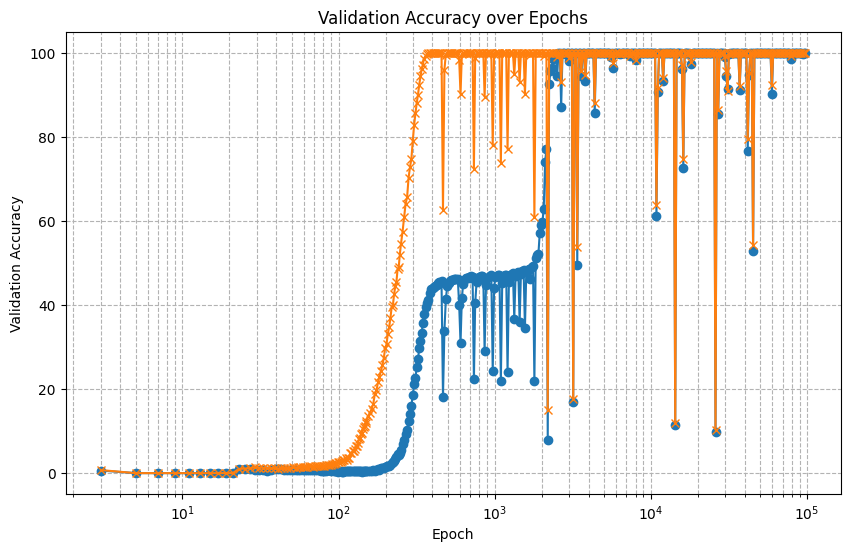

In [165]:
csvpath = os.path.join('../expt-test-231031-domain/run-addition-batchfrac-0.5-trpct-50', 'lightning_logs/version_0/metrics.csv')
plot_val_acc(csvpath, scale='log')

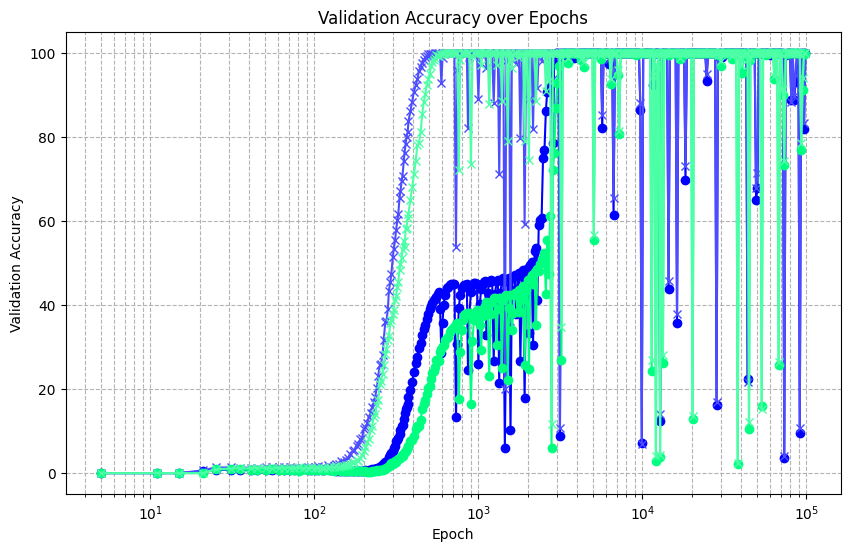

In [113]:
path_dup_0p5_frac_0p2 = os.path.join('../expt-231030-batchfrac-0p2/run-addition-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
path_dup_0_frac_0p2 = os.path.join('../expt-2-batchsize-0p2-no-duplication/run-addition-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
plot_multiple_val_acc([path_dup_0p5_frac_0p2, path_dup_0_frac_0p2], scale='log')

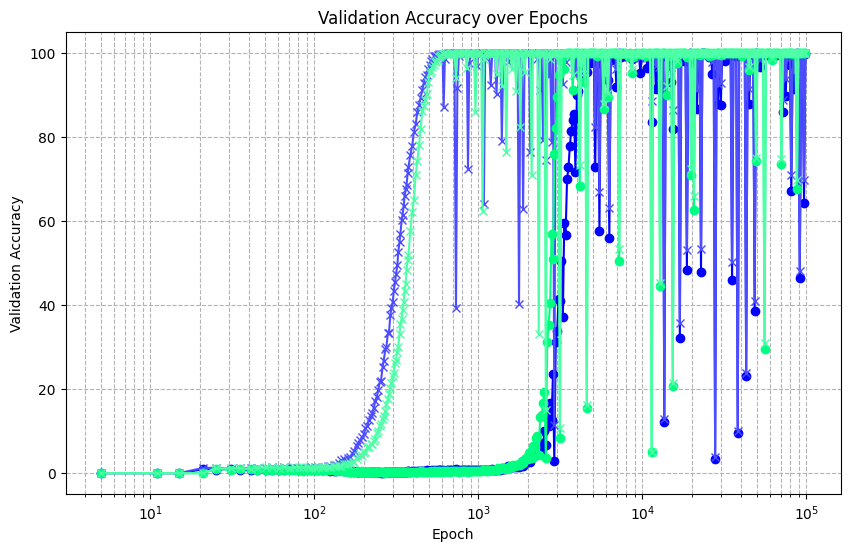

In [92]:
path_dup_0p5_frac_0p2 = os.path.join('../expt-231030-batchfrac-0p2/run-subtraction-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
path_dup_0_frac_0p2 = os.path.join('../expt-2-batchsize-0p2-no-duplication/run-subtraction-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
plot_multiple_val_acc([path_dup_0p5_frac_0p2, path_dup_0_frac_0p2], scale='log')

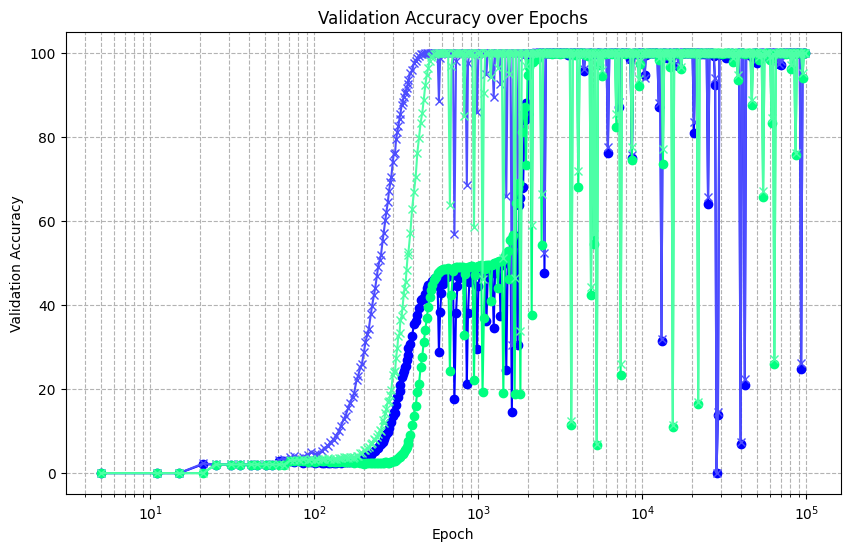

In [94]:
path_dup_0p5_frac_0p2 = os.path.join('../expt-231030-batchfrac-0p2/run-muliplication-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
path_dup_0_frac_0p2 = os.path.join('../expt-2-batchsize-0p2-no-duplication/run-muliplication-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
plot_multiple_val_acc([path_dup_0p5_frac_0p2, path_dup_0_frac_0p2], scale='log')

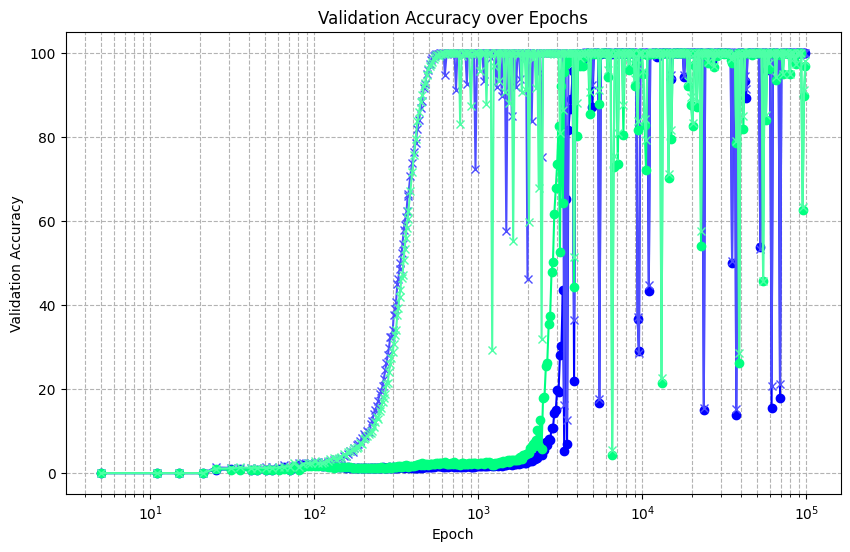

In [95]:
path_dup_0p5_frac_0p2 = os.path.join('../expt-231030-batchfrac-0p2/run-division-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
path_dup_0_frac_0p2 = os.path.join('../expt-2-batchsize-0p2-no-duplication/run-division-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
plot_multiple_val_acc([path_dup_0p5_frac_0p2, path_dup_0_frac_0p2], scale='log')

../expt-231030-batchfrac-0p2\hparams.yaml\lightning_logs/version_0/metrics.csv doesn't exists


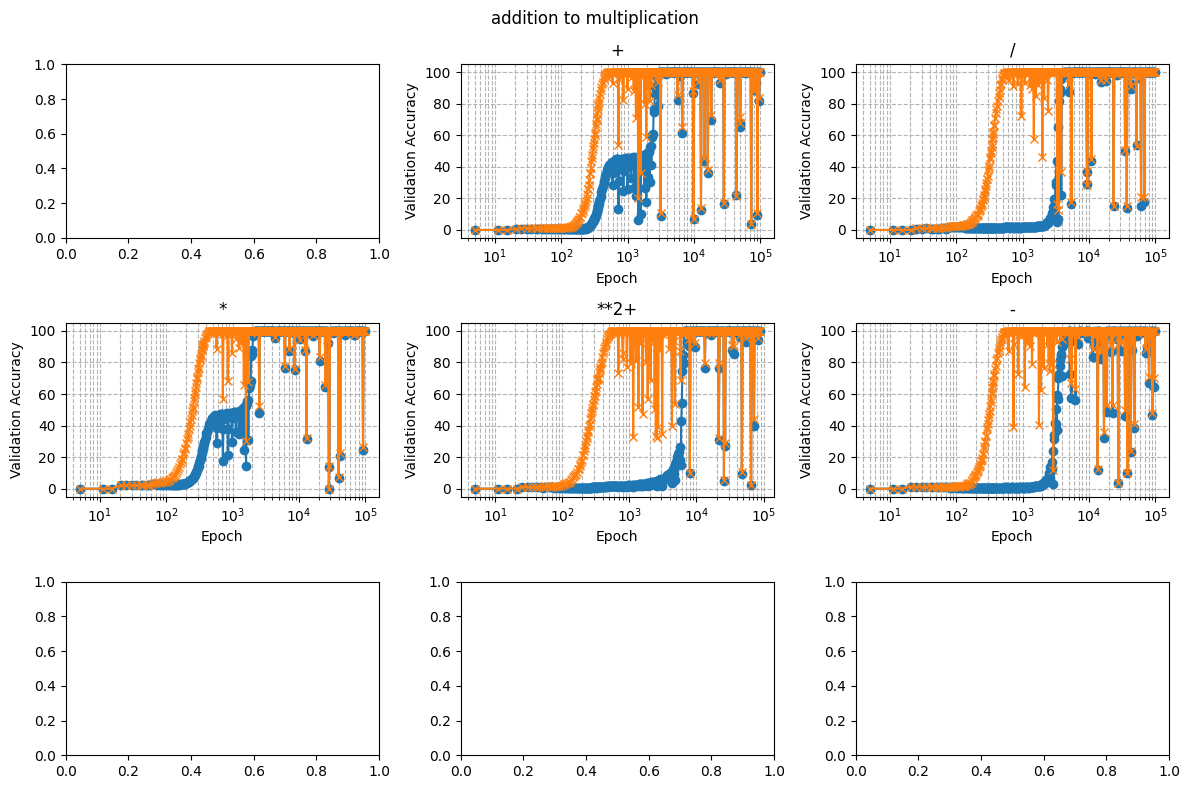

In [125]:
batches = get_plot_batches('../expt-231030-batchfrac-0p2', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-test-4-duplication-0p5/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


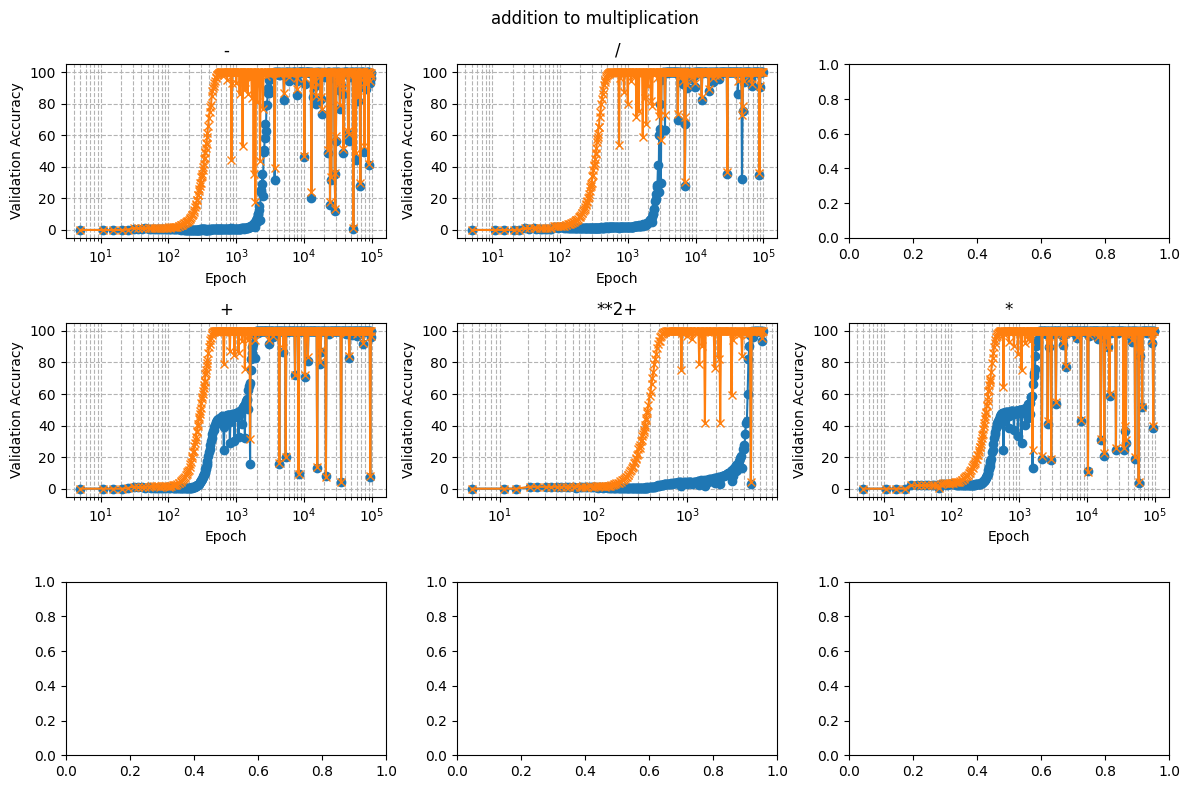

In [16]:
batches = get_plot_batches('./expt-231030/expt-test-4-duplication-0p5', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-2-batchsize-0p2-no-duplication/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


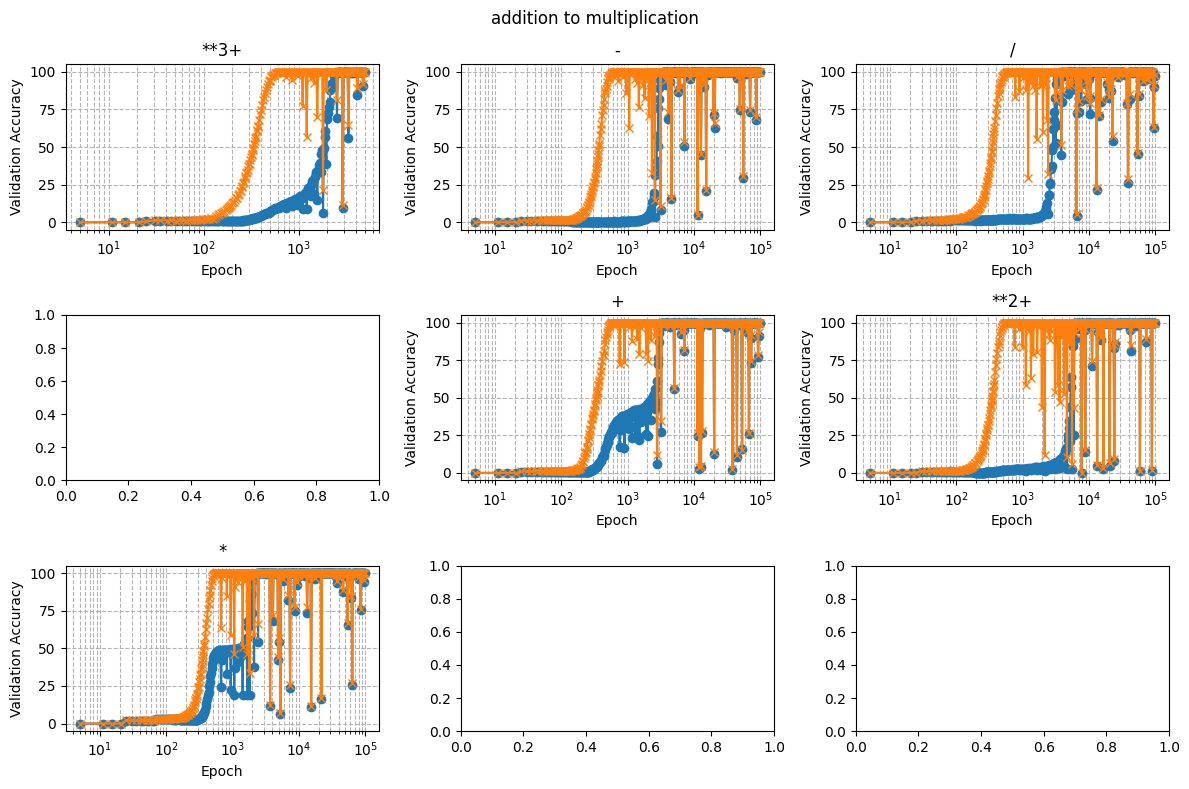

In [17]:
batches = get_plot_batches('./expt-231030/expt-2-batchsize-0p2-no-duplication', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-3-batchsize-0p5-duplication-0p5/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


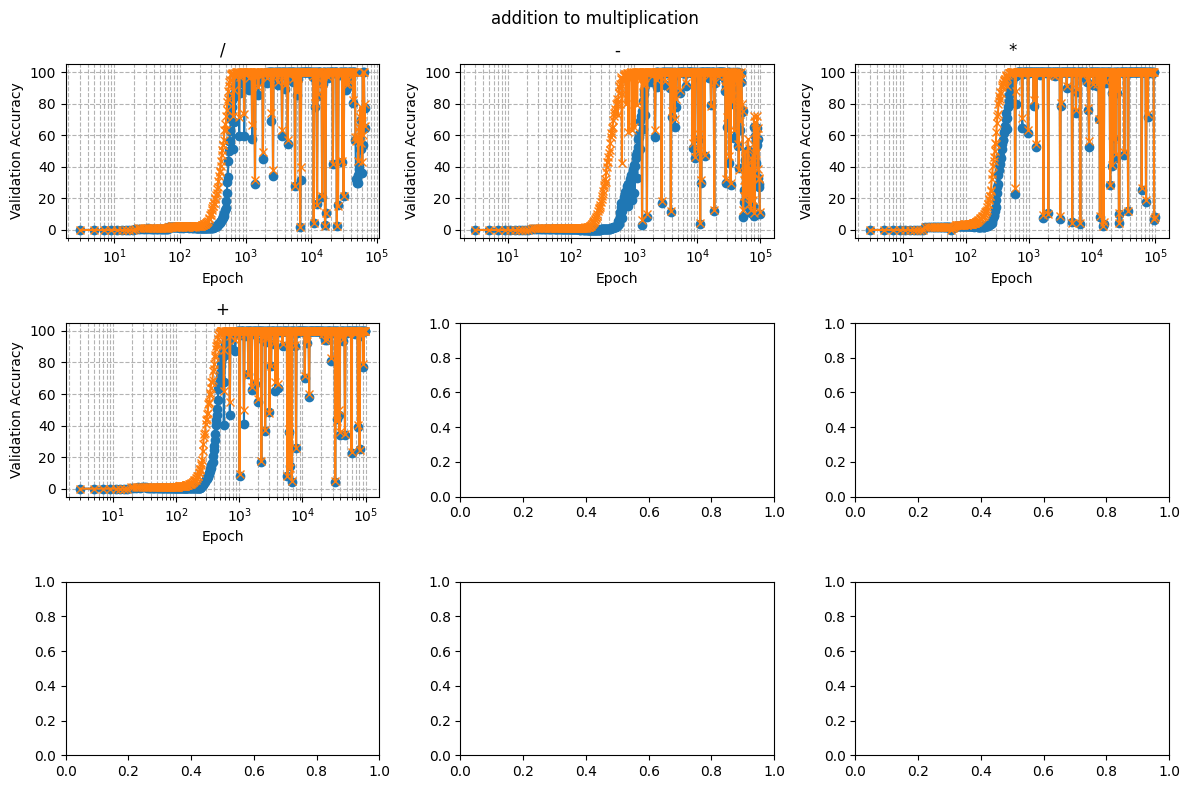

In [18]:
batches = get_plot_batches('./expt-231030/expt-3-batchsize-0p5-duplication-0p5', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

./expt-231030/expt-test-4-duplication-0p5/hparams.yaml/lightning_logs/version_0/metrics.csv doesn't exists


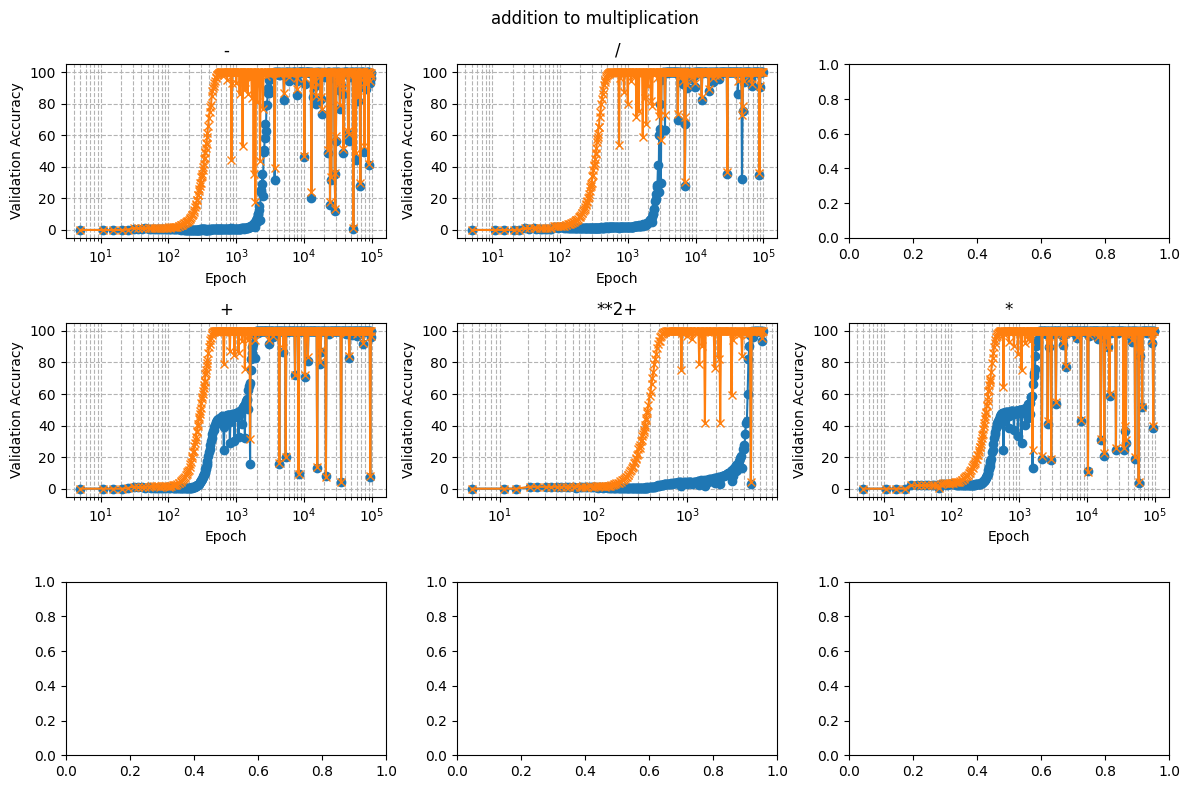

In [13]:
draw_figure('addition to multiplication', batches[0], save_fig=False)

In [15]:
draw_figure('quad1 to subtraction', batches[1], save_fig=False)

KeyError: 1

In [158]:
batches = get_plot_batches('../expt-3', 9)

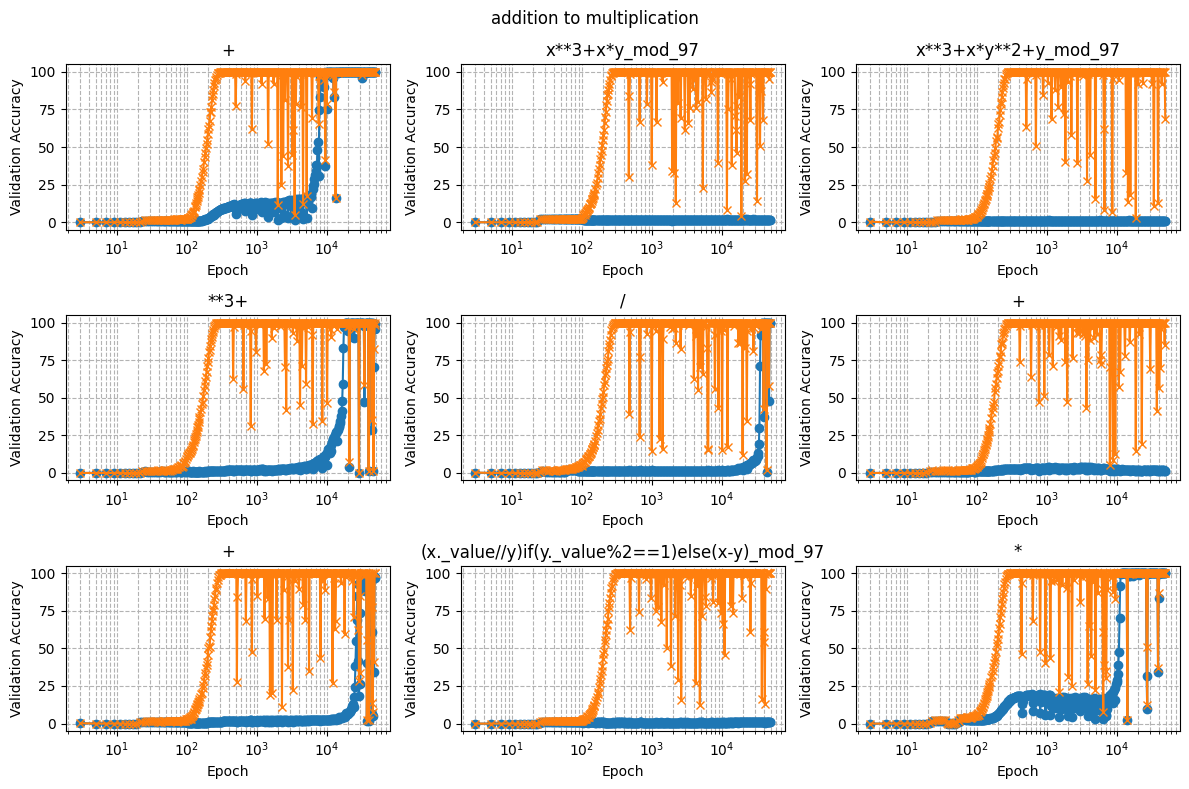

In [159]:
draw_figure('addition to multiplication', batches[0], save_fig=False)

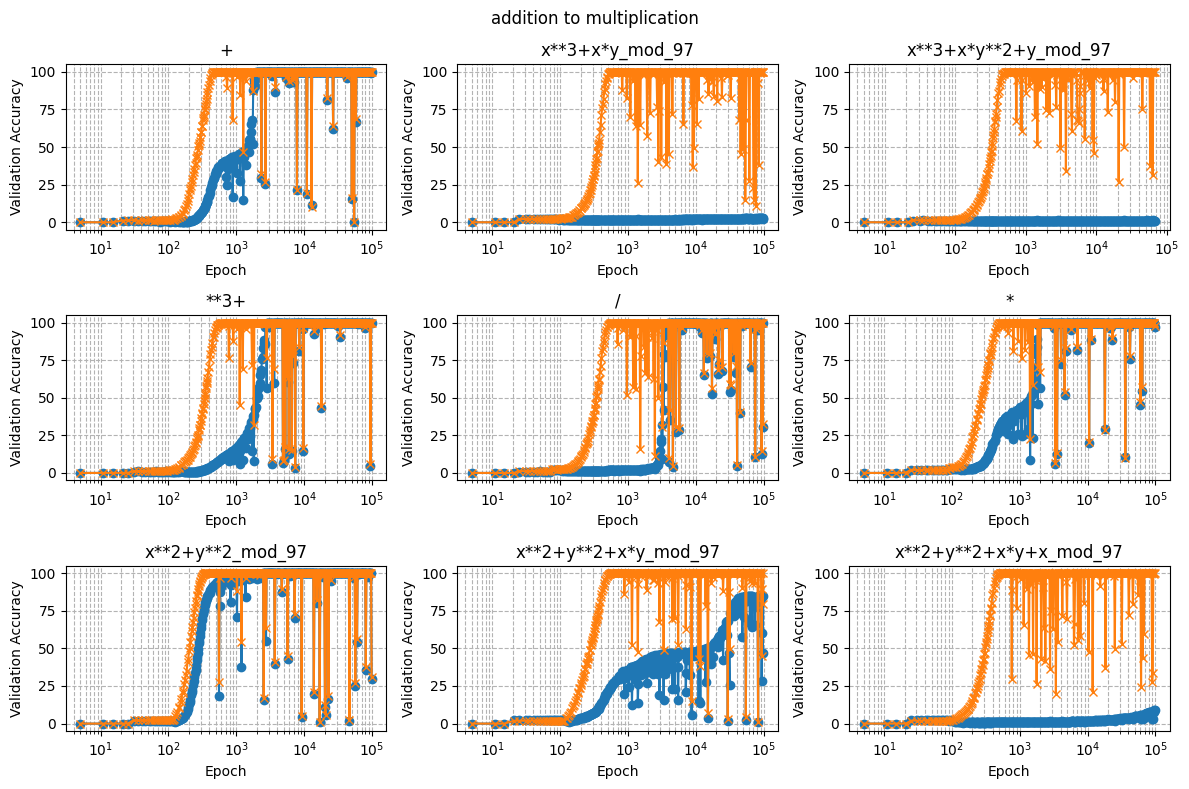

In [160]:
batches = get_plot_batches('../expt-4', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

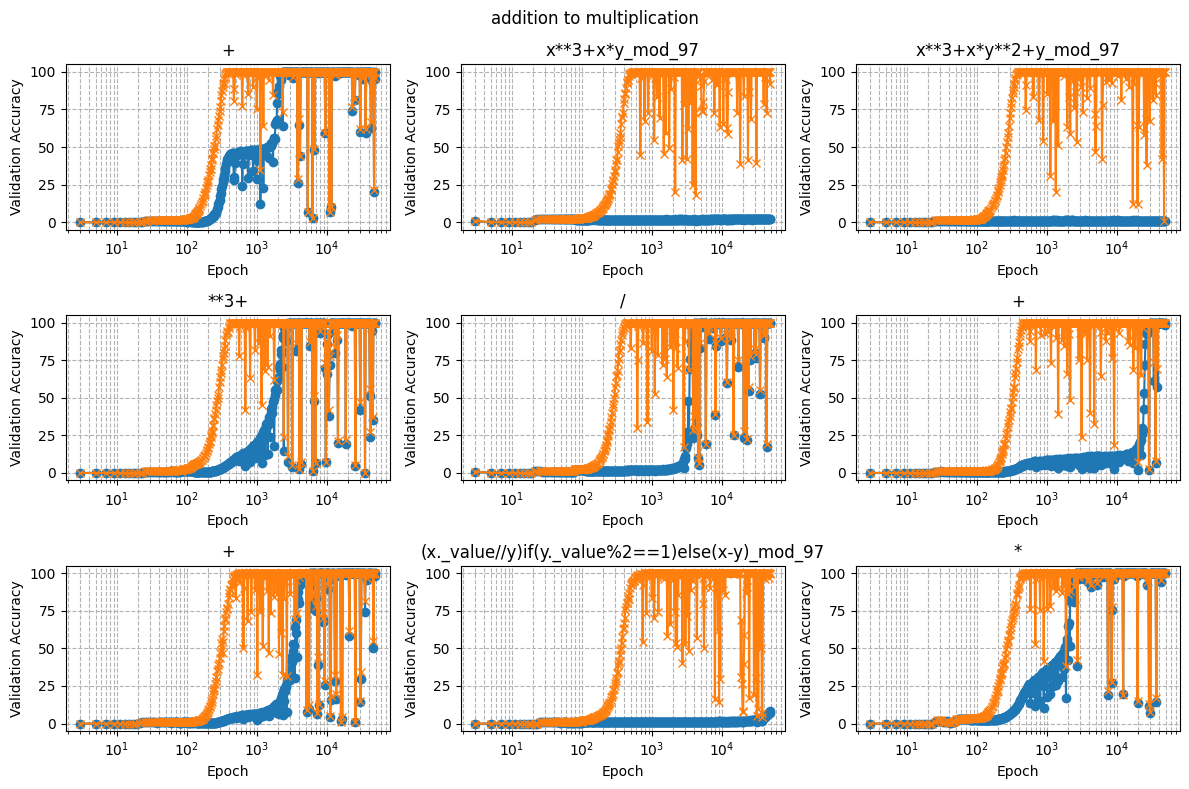

In [10]:
batches = get_plot_batches('../expt-2', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

../expt-5\hparams.yaml\lightning_logs/version_0/metrics.csv doesn't exists


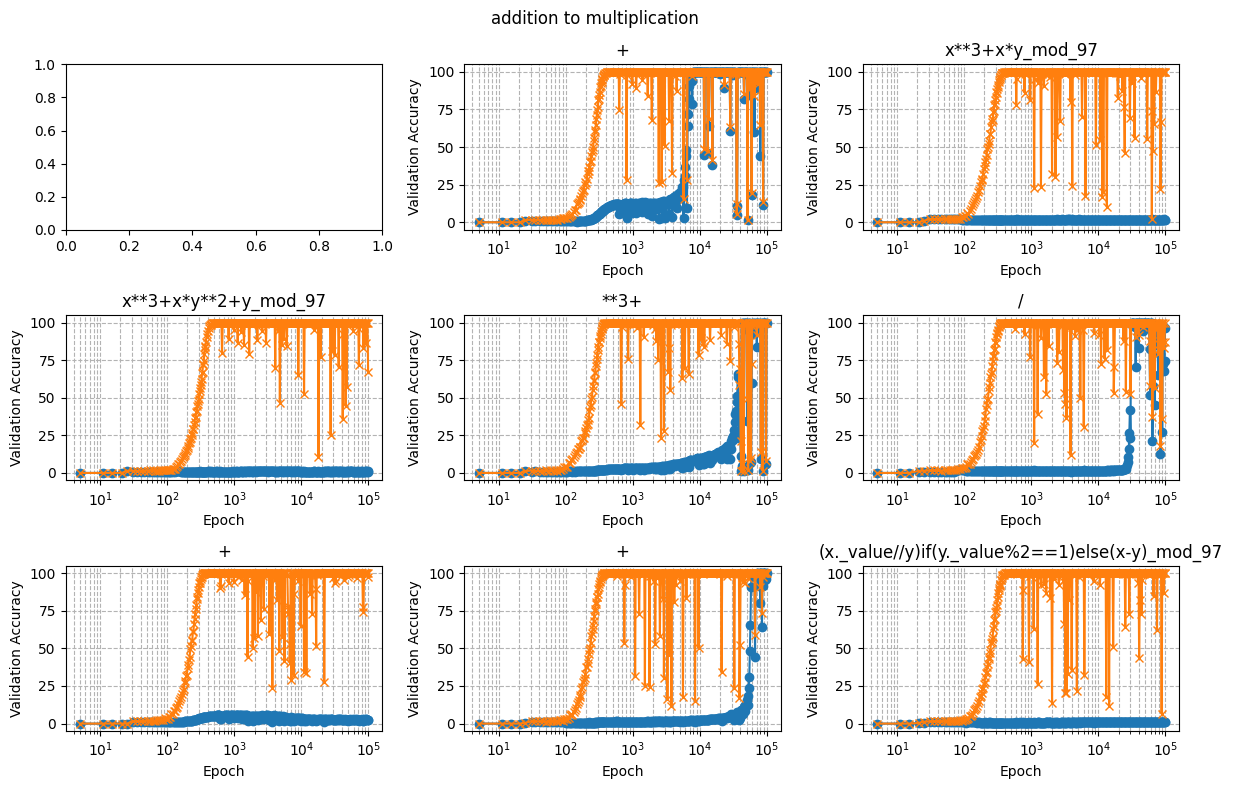

In [9]:
batches = get_plot_batches('../expt-5', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

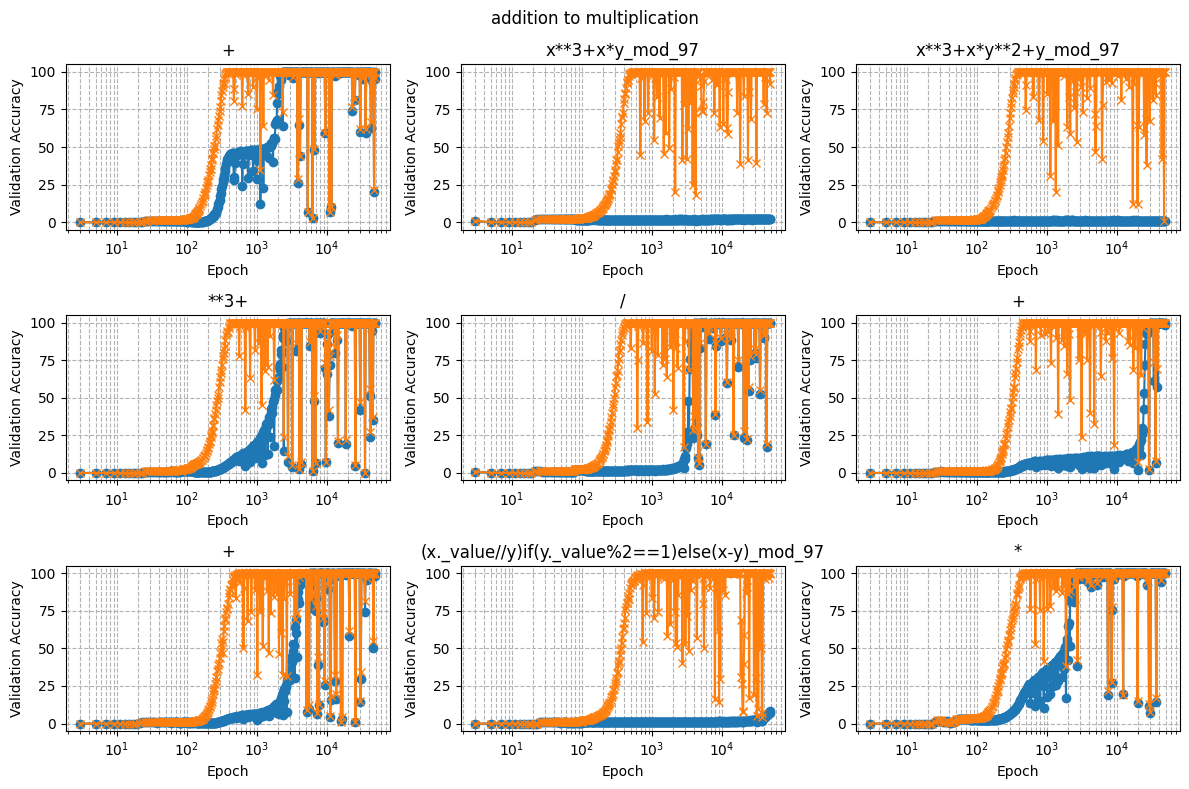

In [161]:
batches = get_plot_batches('../expt-2', 9)
draw_figure('addition to multiplication', batches[0], save_fig=False)

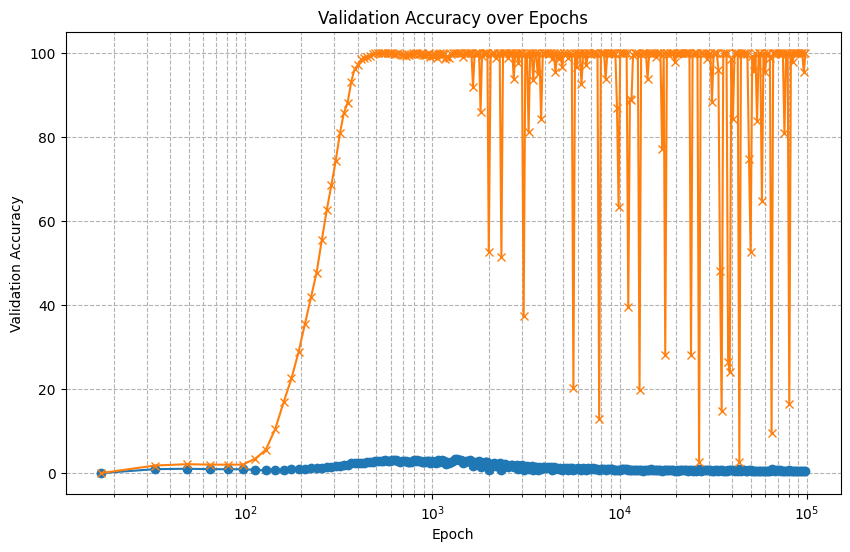

In [5]:
plot_val_acc("../run-addition-frac-p60-trpct10/lightning_logs/version_0/metrics.csv", 'log')

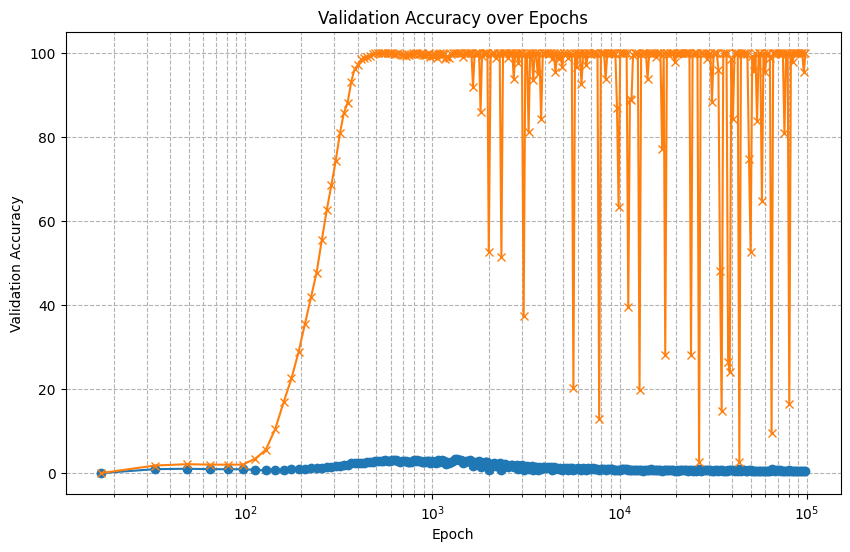

In [9]:
plot_val_acc("../run-addition-frac-p60-trpct10/lightning_logs/version_0/metrics.csv", 'log')

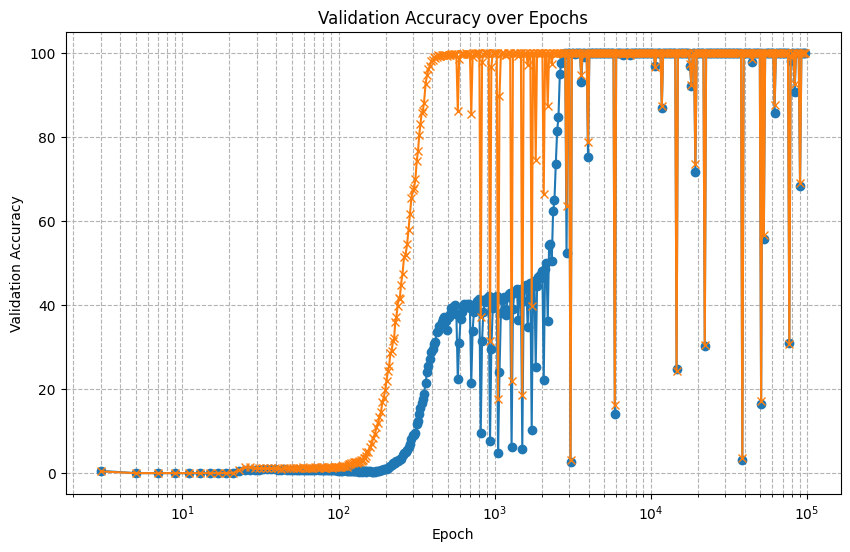

In [12]:
plot_val_acc("../run-addition-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

In [138]:
plot_val_acc("../run-s5-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

../run-s5-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv doesn't exists


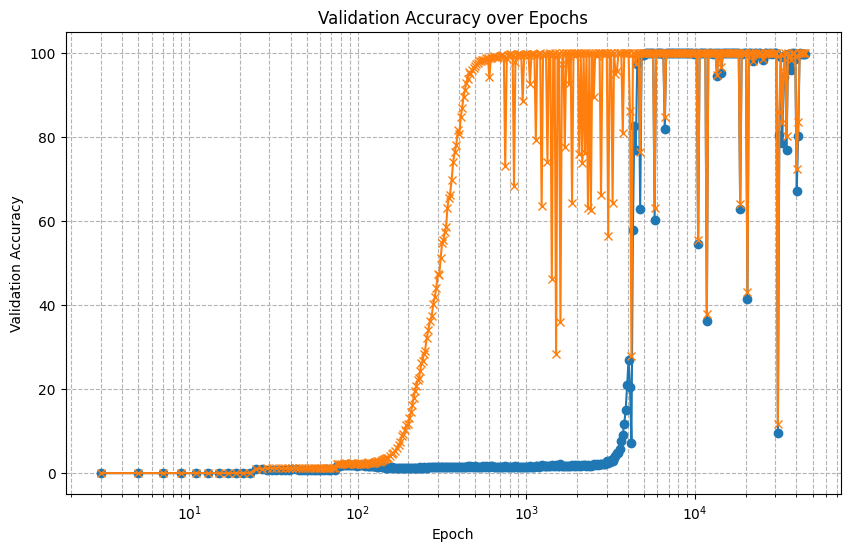

In [14]:
plot_val_acc("../run-division-batchfrac-0p60-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

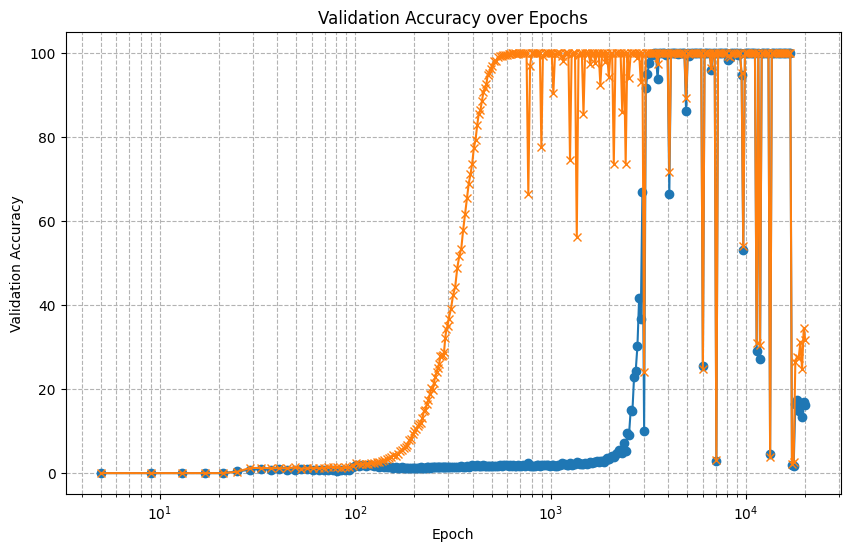

In [16]:
plot_val_acc("../run-division-batchfrac-0p30-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

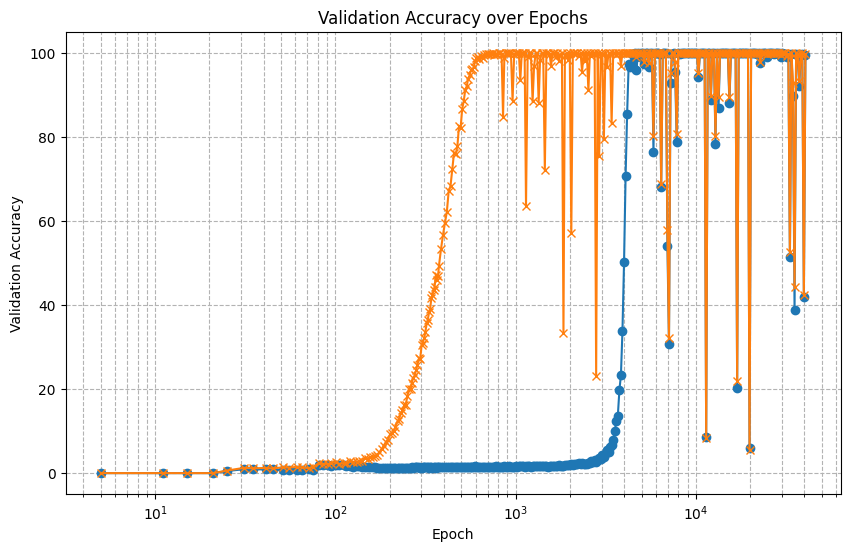

In [17]:
plot_val_acc("../run-division-batchfrac-0p20-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

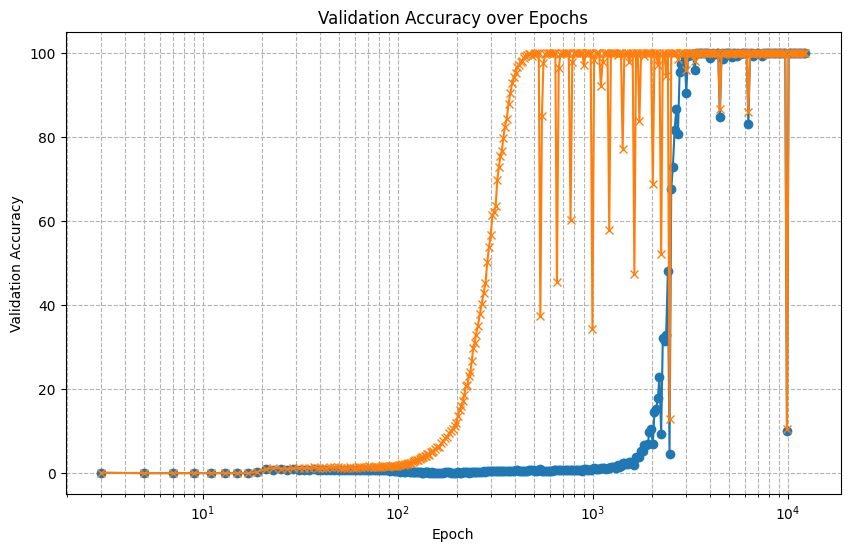

In [20]:
plot_val_acc("../expt-1/run---batchfrac-0.5-trpct-50/lightning_logs/version_0/metrics.csv", 'log')

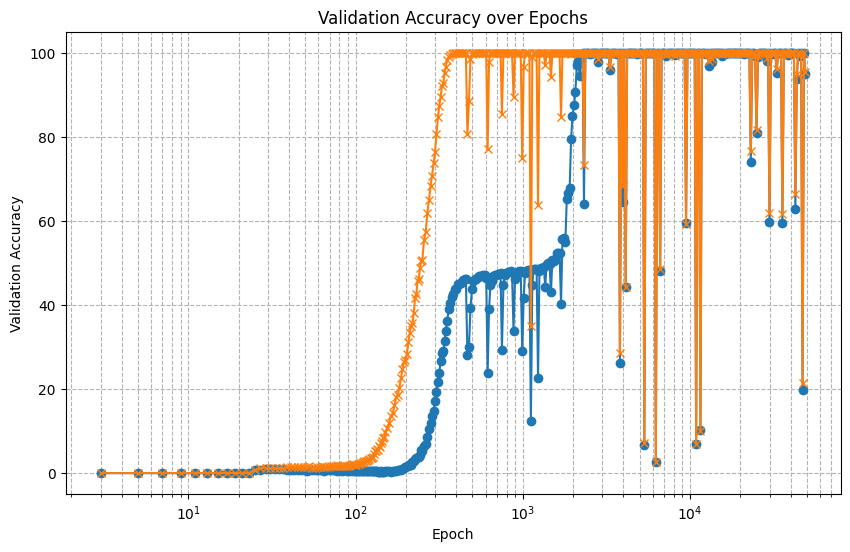

In [157]:
plot_val_acc("../expt-2/run-addition-batchfrac-0.5-trpct-50/lightning_logs/version_0/metrics.csv", scale='log', save_fig=True)

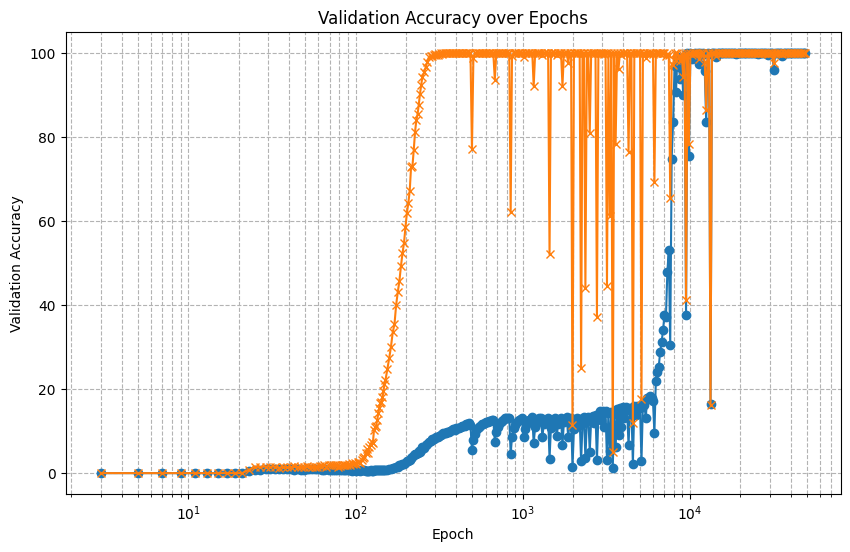

In [156]:
plot_val_acc("../expt-3/run-addition-batchfrac-0.5-trpct-25/lightning_logs/version_0/metrics.csv", scale='log', save_fig=True)

In [75]:
def plot_val_acc_of_two(csvpaths, ax=None, scale='arithmetic', title='Validation Accuracy over Epochs', save_fig=False):
    is_single_plot = ax == None
    _fig = None if is_single_plot else ax
    if is_single_plot:
        plt.figure(figsize=(10, 6))

    # Step 1: Choose a colormap
    colormap = plt.cm.get_cmap('winter')  # 'viridis' is a popular colormap. You can choose any other.
    
    # Step 2: Create a color sequence based on the number of csvpaths
    colors = [colormap(i) for i in np.linspace(0, 1, len(csvpaths))]

    for idx, csvpath in enumerate(csvpaths):
        df = pd.read_csv(csvpath)
        
        # Plotting val_accuracyZ
        if is_single_plot:
            plt.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-', color=colors[idx])
            plt.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-', color=colors[idx])
        else:
            _fig.plot(df['step'], df['val_accuracy'], marker='o', linestyle='-', color=colors[idx])
            _fig.plot(df['step'], df['full_train_acc'], marker='x', linestyle='-', color=colors[idx])    

        if is_single_plot:
            plt.title(title)
            plt.xlabel('Epoch')
            plt.ylabel('Validation Accuracy')
        else:
            _fig.set_title(title)
            _fig.set_xlabel('Epoch')
            _fig.set_ylabel('Validation Accuracy')
            
        if scale == 'arithmetic':
            if is_single_plot:
                plt.grid(True)
            else:
                _fig.grid(True)
                
        elif scale == 'log':
            if is_single_plot:
                plt.xscale('log')
                plt.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
            else:
                _fig.set_xscale('log')
                _fig.grid(True, which="both", ls="--", c='0.7')  # this will ensure that the grid appears correctly on log scale
    if save_fig:
        plt.savefig(f'{get_operator_symbols(csvpath)}.png', bbox_inches='tight')


C:\Users\tomat\AppData\Local\Temp\ipykernel_15516\1203500323.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('winter')  # 'viridis' is a popular colormap. You can choose any other.


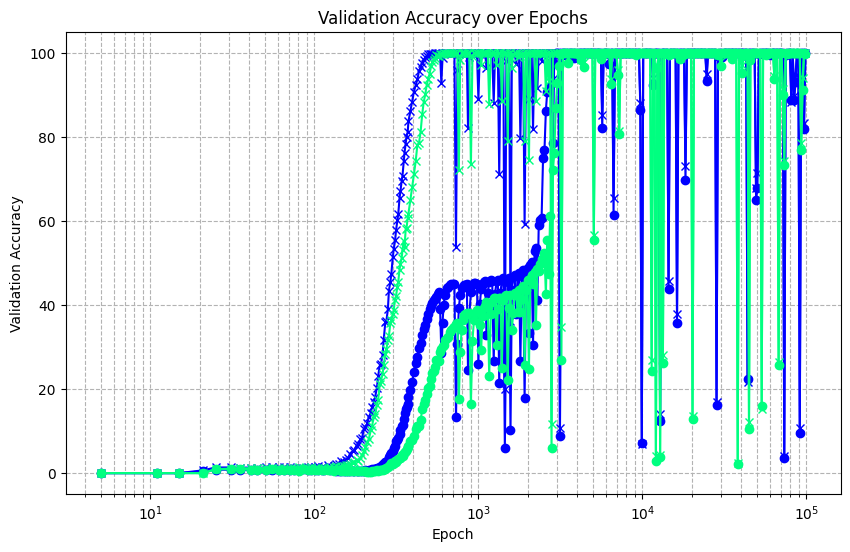

In [76]:
path_dup_0p5_frac_0p2 = os.path.join('../expt-231030-batchfrac-0p2/run-addition-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
path_dup_0_frac_0p2 = os.path.join('../expt-2-batchsize-0p2-no-duplication/run-addition-batchfrac-0.2-trpct-50', 'lightning_logs/version_0/metrics.csv')
plot_val_acc_of_two([path_dup_0p5_frac_0p2, path_dup_0_frac_0p2], scale='log')